<h2><b>Data Science Project: Bank Marketing (Campaign)
    Week 12</b></h2>

<b>Team Member's Details:</b>
Group name - Data Science Enthusiasts

<b>MEMBER 1</b> - Amira Asta

<b>EMAIL ID</b> - amira.asta02@gmail.com 

<b>COUNTRY</b> - Tunisia

<b>COLLEGE/COMPANY</b> - Afrikanda 

<b>SPECIALIZATION</b> - Data Science


<b>MEMBER 2</b> - Vatsal Vinesh Mandalia

<b>EMAIL ID</b> - vatsalvm10@outlook.com

<b>COUNTRY</b> - Oman

<b>COLLEGE/COMPANY</b> - Graduated

<b>SPECIALIZATION</b> - Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# bank-additional data
bk_add_full = pd.read_csv('~/Downloads/bank-additional/bank-additional-full.csv', delimiter = ';')
bk_add = pd.read_csv('~/Downloads/bank-additional/bank-additional.csv', delimiter = ';')

# bank-full data
bank_full = pd.read_csv('~/Downloads/bank/bank-full.csv', delimiter = ';')
bank = pd.read_csv('~/Downloads/bank/bank.csv', delimiter = ';')

In [3]:
# bank-additional-full and bank-additional data
print('bank-additional-full data:\n', bk_add_full.head())
print(bk_add_full.info())
print('\n')
print('bank-additional data:\n', bk_add.head())
print(bk_add.info())
# print('-------')
# print('\n')
# print('bank-full data:\n', bank_full.head())
# print(bank_full.info())
# print('\n')
# print('bank data:\n', bank.head())
# print(bank.info())

bank-additional-full data:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  

In [4]:
# To check for duplicate rows
# bank-additional-full and bank-additional data
print(bk_add_full.duplicated().sum())
print('There are 12 rows whose duplicates are also present in bank-additional-full data')
bk_add_full.drop_duplicates(keep = 'first', inplace = True)

print(bk_add.duplicated().sum())
print('No duplicate rows in bank-additional data')

# bank-full and bank data
print(bank_full.duplicated(keep = False).sum())
print('No duplicate rows in bank-full data')
print(bank.duplicated(keep = False).sum())
print('No duplicate rows in bank data')

12
There are 12 rows whose duplicates are also present in bank-additional-full data
0
No duplicate rows in bank-additional data
0
No duplicate rows in bank-full data
0
No duplicate rows in bank data


In [5]:
# Finally, the 'duration' feature is dropped from the datasets.
# This is due to description of the feature given in the Bank Marketing (Campaign) page
bk_add_full.drop('duration', axis = 1, inplace = True)
bk_add.drop('duration', axis = 1, inplace = True)  

In [6]:
# Model building
bk_add_full_copy = bk_add_full
# Target and Feature set
y = bk_add_full[['y']]
X = bk_add_full.drop('y', axis = 1, inplace = False)

In [7]:
# Storing the numeric and categorical variable names
numeric_types = list(bk_add_full.select_dtypes(include = ['int64', 'float64']).columns)
# print(numeric_types)
categorical_types = list(X.select_dtypes(include = ['object']).columns)
print(categorical_types)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [8]:
# Label Encoder
le = LabelEncoder()
for feature in categorical_types:
    X[feature] = le.fit_transform(X[feature])

In [15]:
le_y = LabelEncoder()
y = le.fit_transform(bk_add_full_copy['y'])
print(y)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [16]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)

# Initiating the regressor
logreg = LogisticRegression()

# Fitting the model on the training data
logreg.fit(X_train, y_train)

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3658
           1       0.71      0.20      0.31       460

   micro avg       0.90      0.90      0.90      4118
   macro avg       0.81      0.60      0.63      4118
weighted avg       0.89      0.90      0.88      4118

ROC_AUC score =  0.5958928613877862


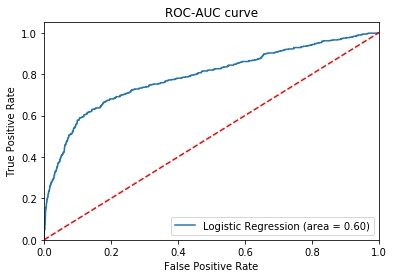

In [19]:
# Prediction from the model
y_pred = logreg.predict(X_test)
log_accuracy = logreg.score(X_test, y_test)

confusion_matrix_y = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# ROC_AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print('ROC_AUC score = ', log_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()